In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('cs-training.csv', index_col= 0)
data.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [5]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [10]:
# 
data['MonthlyIncome'] = data.MonthlyIncome.fillna(data.MonthlyIncome.median())
data['NumberOfDependents'] = data.NumberOfDependents.fillna(data.NumberOfDependents.median())

In [11]:
# kiểm tra missing data
data.isnull().sum() / data.shape[0] * 100

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [12]:
data.duplicated().sum()

767

In [18]:
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()


0

### 3.Exploration

In [24]:
ex = np.unique(data.SeriousDlqin2yrs, return_counts=True)[1]

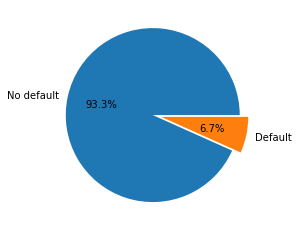

In [26]:
plt.pie(ex, labels = ['No default', 'Default'], explode=(0, 0.1), autopct='%.1f%%');

In [27]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [31]:
column = ['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines']
loan_gr = data.groupby('SeriousDlqin2yrs')[column].max()
loan_gr

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
SeriousDlqin2yrs,,
0,58,54
1,57,29


In [ ]:
_, axes = 